In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mofax as mfx

rcParams['figure.dpi'] = 200

In [3]:
m = mfx.mofa_model("model/mofa.hdf5")

In [4]:
print(f"""\
Cells: {m.shape[0]}
Features: {m.shape[1]}
Groups of cells: {', '.join(m.groups)}
Views: {', '.join(m.views)}
""")

Cells: 5183
Features: 24794
Groups of cells: group0
Views: view0, view1, view2, view3



In [5]:
# HDF5 group
print("HDF5 group:\n", m.weights)

# np.ndarray
print("\nnp.ndarray:\n", m.get_weights()[:3,:5])

# pd.DataFrame
print("\npd.DataFrame:\n", m.get_weights(df=True).iloc[:3,:5])

HDF5 group:
 <HDF5 group "/expectations/W" (4 members)>

np.ndarray:
 [[-2.09458574e-07 -2.53419780e-07 -9.74589495e-07 -1.34641861e-08
   2.91722842e-05]
 [ 3.08879928e-08  5.05041059e-07 -5.84085823e-07 -1.41057194e-08
   1.11152928e-05]
 [ 7.85561640e-08  5.40423214e-07  3.02315110e-07 -1.76609699e-08
   2.23353006e-04]]

pd.DataFrame:
                      Factor1       Factor2       Factor3       Factor4  \
feature0_view0 -2.094586e-07 -2.534198e-07 -9.745895e-07 -1.346419e-08   
feature1_view0  3.088799e-08  5.050411e-07 -5.840858e-07 -1.410572e-08   
feature2_view0  7.855616e-08  5.404232e-07  3.023151e-07 -1.766097e-08   

                 Factor5  
feature0_view0  0.000029  
feature1_view0  0.000011  
feature2_view0  0.000223  


/home/filippo/code/sciviz/assignments/.venv/lib/python3.12/site-packages/mofax/plot_weights.py:134: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna({"to_label": False})


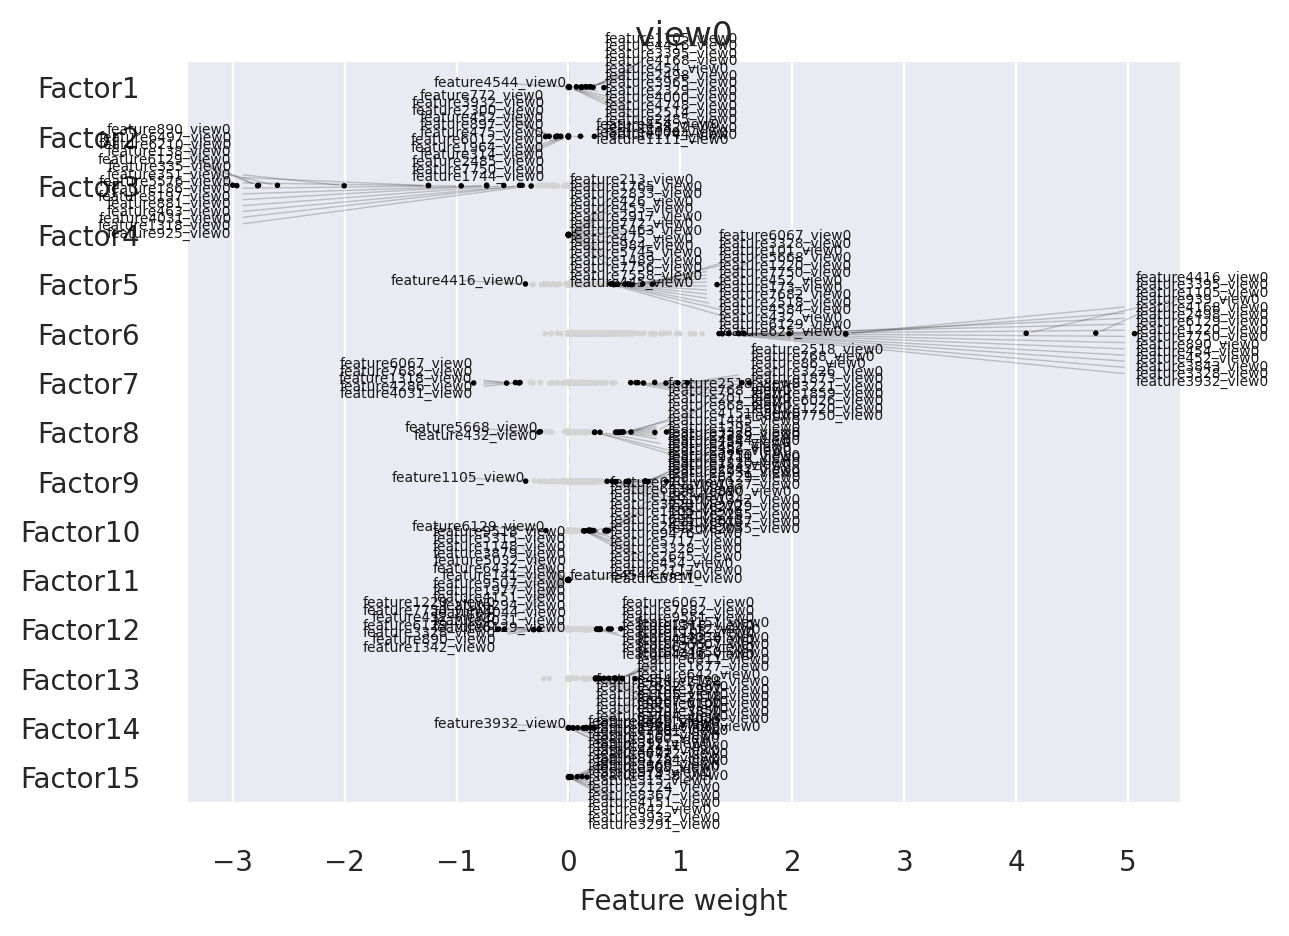

In [7]:
ax = mfx.plot_weights(m, views=["view0"], n_features=15)

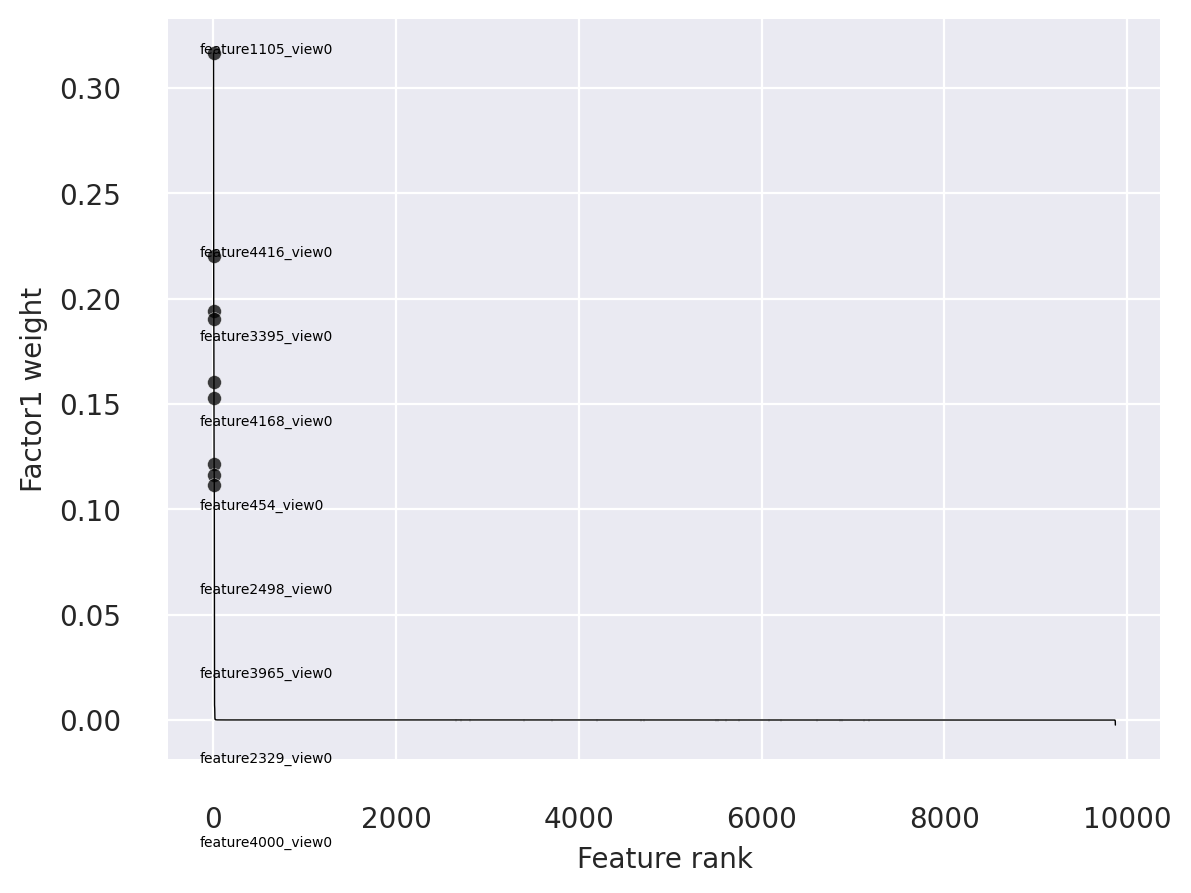

In [9]:
ax = mfx.plot_weights_ranked(m, factor=0, n_features=10,
                             y_repel_coef=0.04, x_rank_offset=-150)
# repel coefficient and offsets can be useful to move labels around
# and there are x_rank_offset and x_rank_offset_neg for positive and negative weights respectively

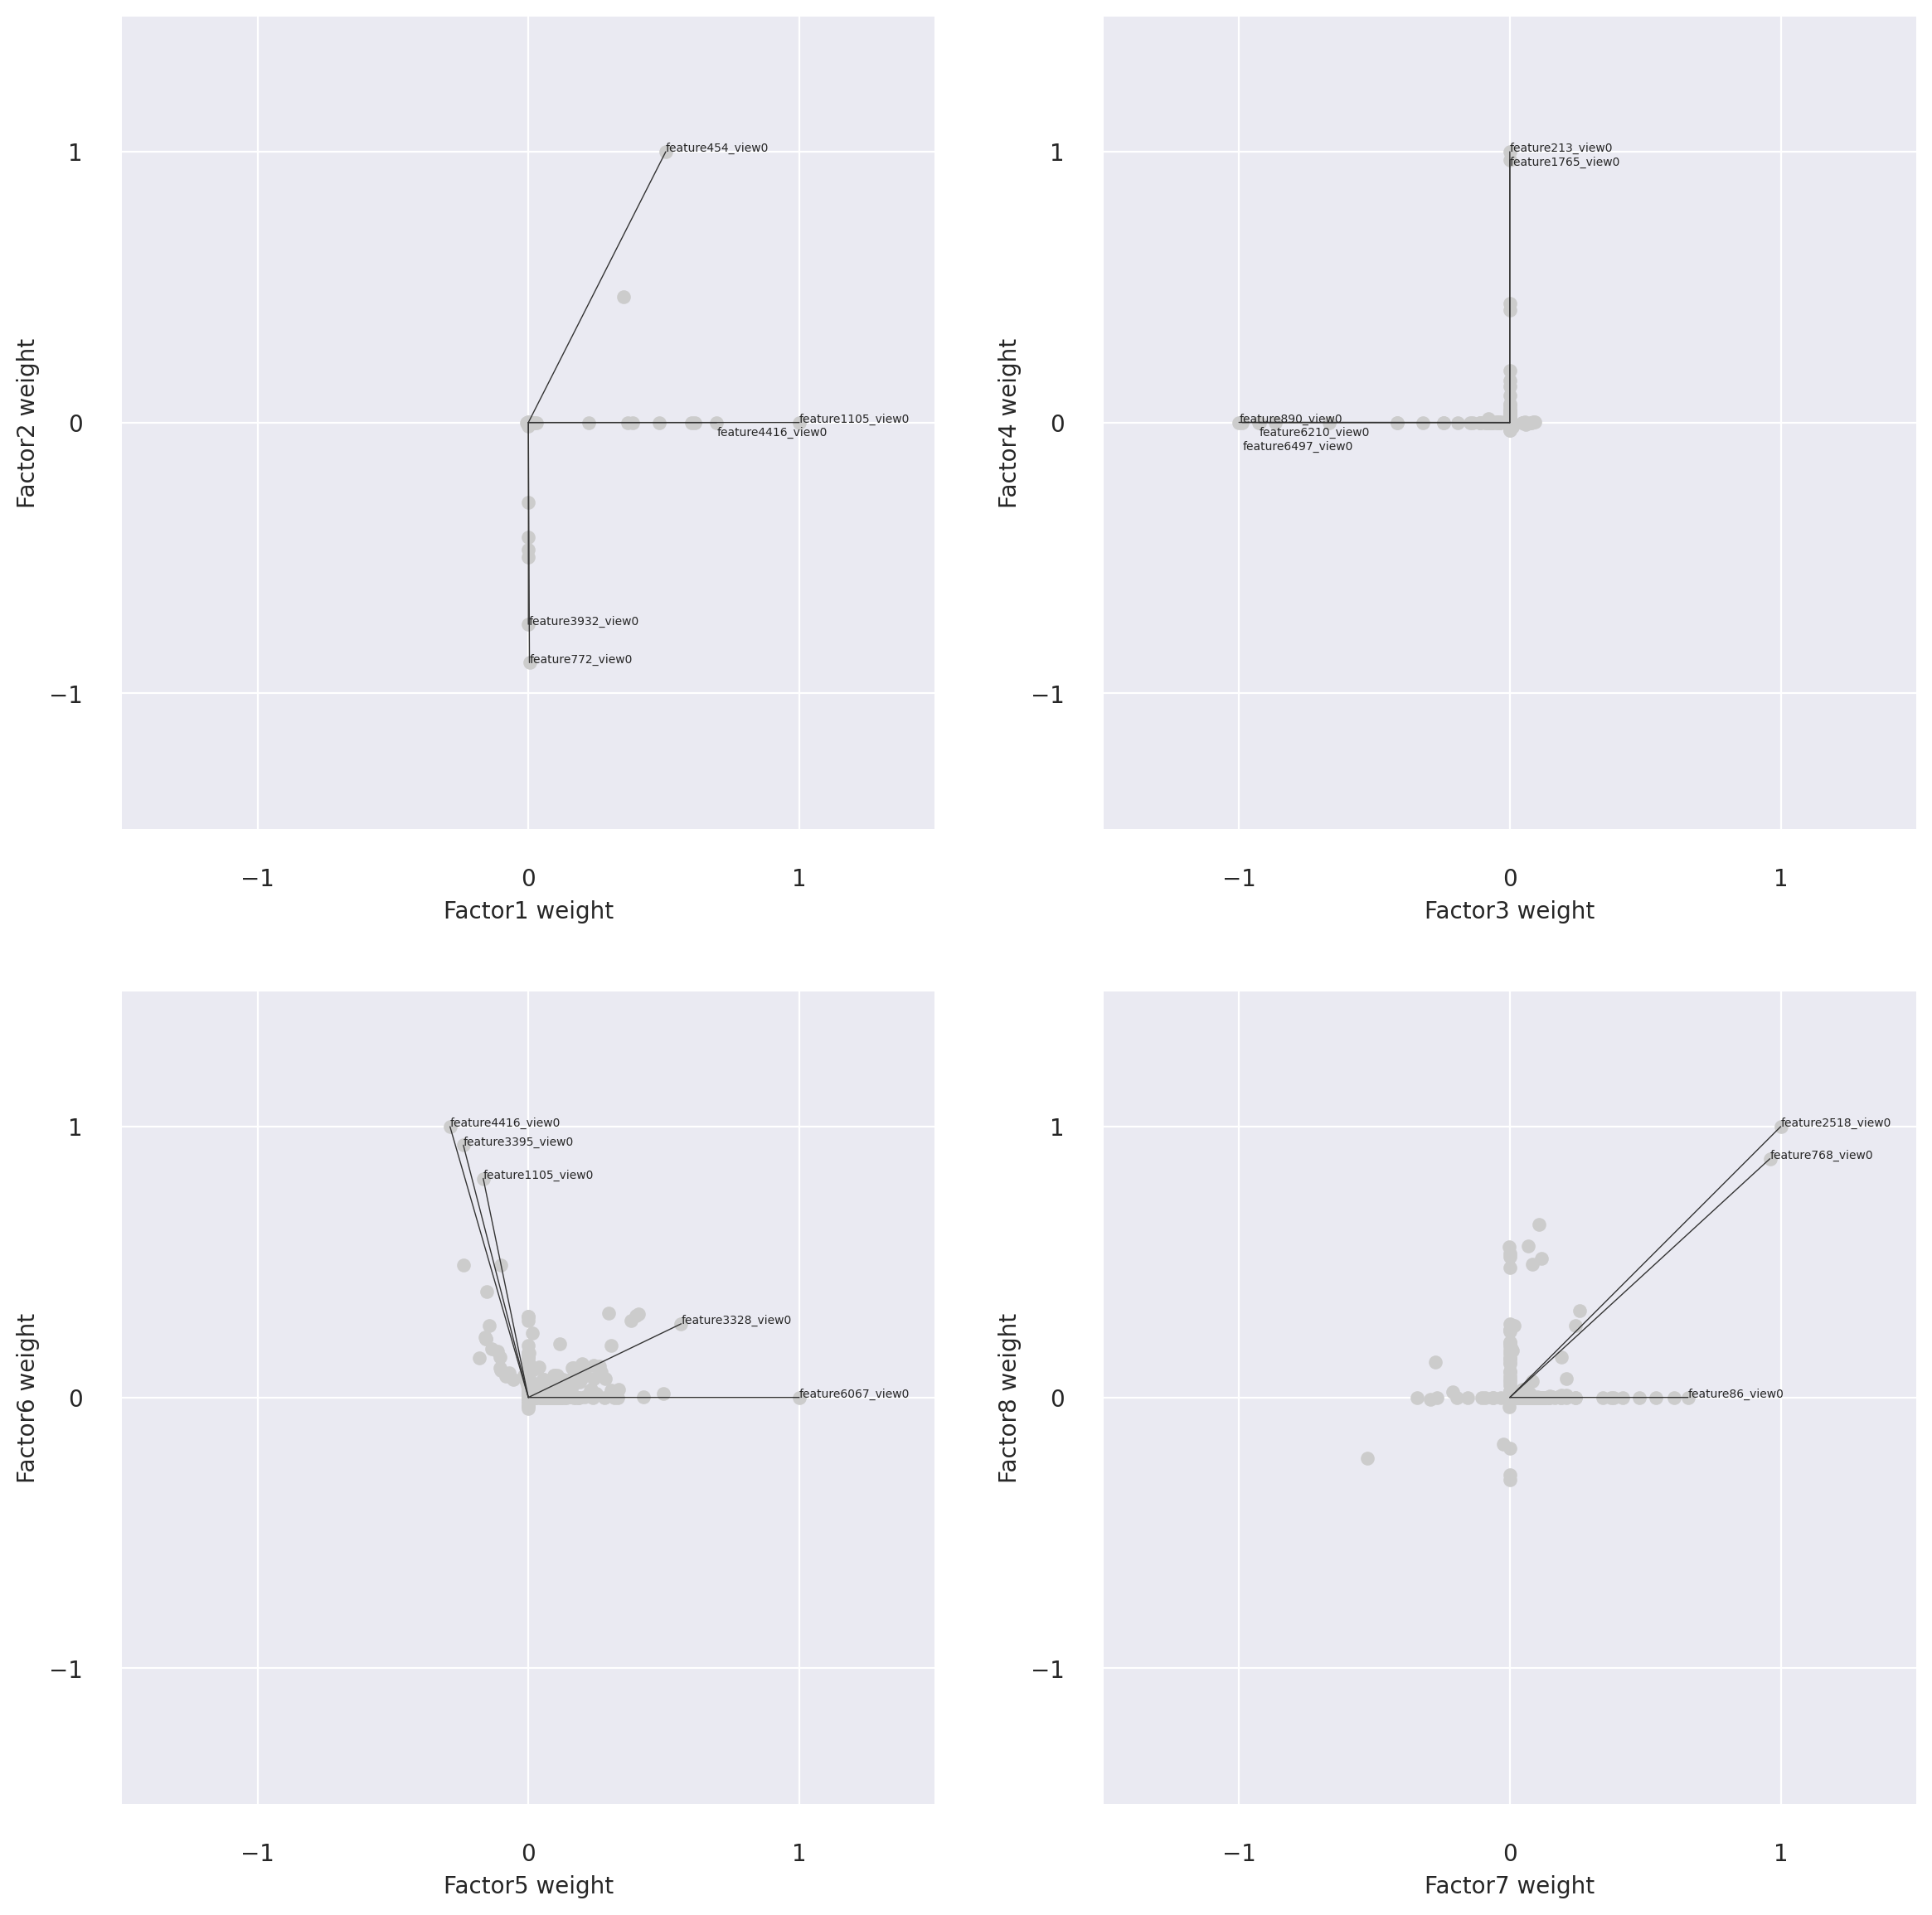

In [10]:
nf = 2
f, axarr = plt.subplots(nf, nf, figsize=(14,14))
fnum = 0
for i in range(nf):
    for j in range(nf):
        mfx.plot_weights_scaled(m, x=fnum, y=fnum+1, n_features=5, ax=axarr[i][j])
        fnum+=2

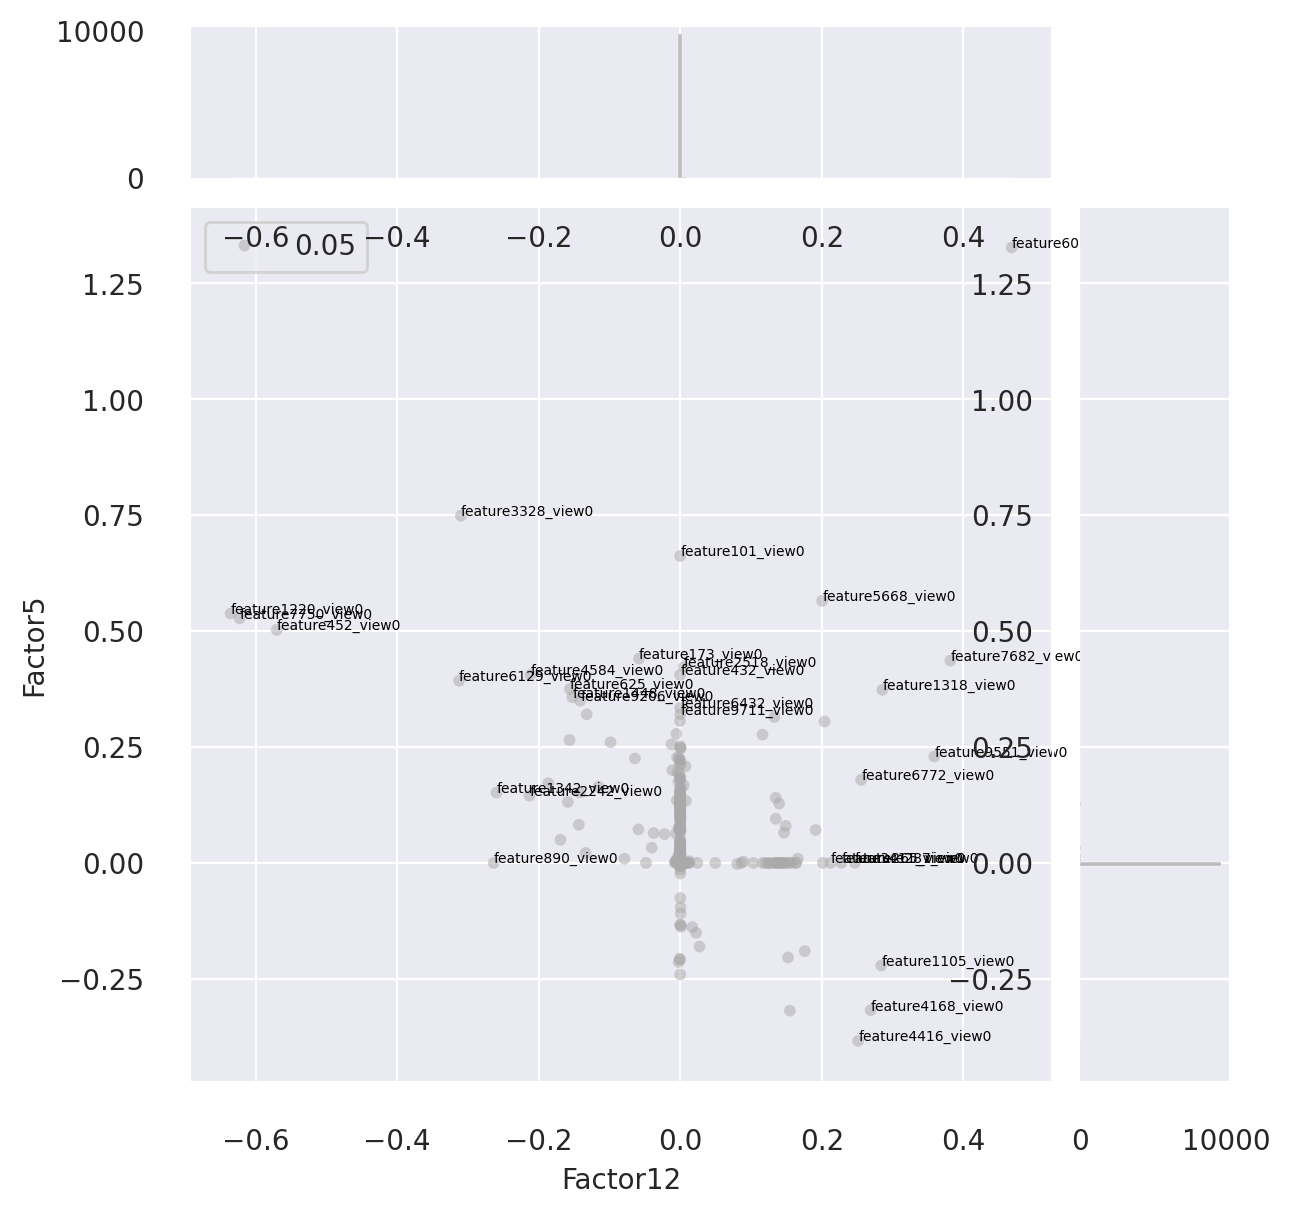

In [12]:
mfx.plot_weights_scatter(m, x="Factor12", y="Factor5",
                         hist=True, n_features=20,
                         size=0.05, linewidth=0, alpha=0.5)

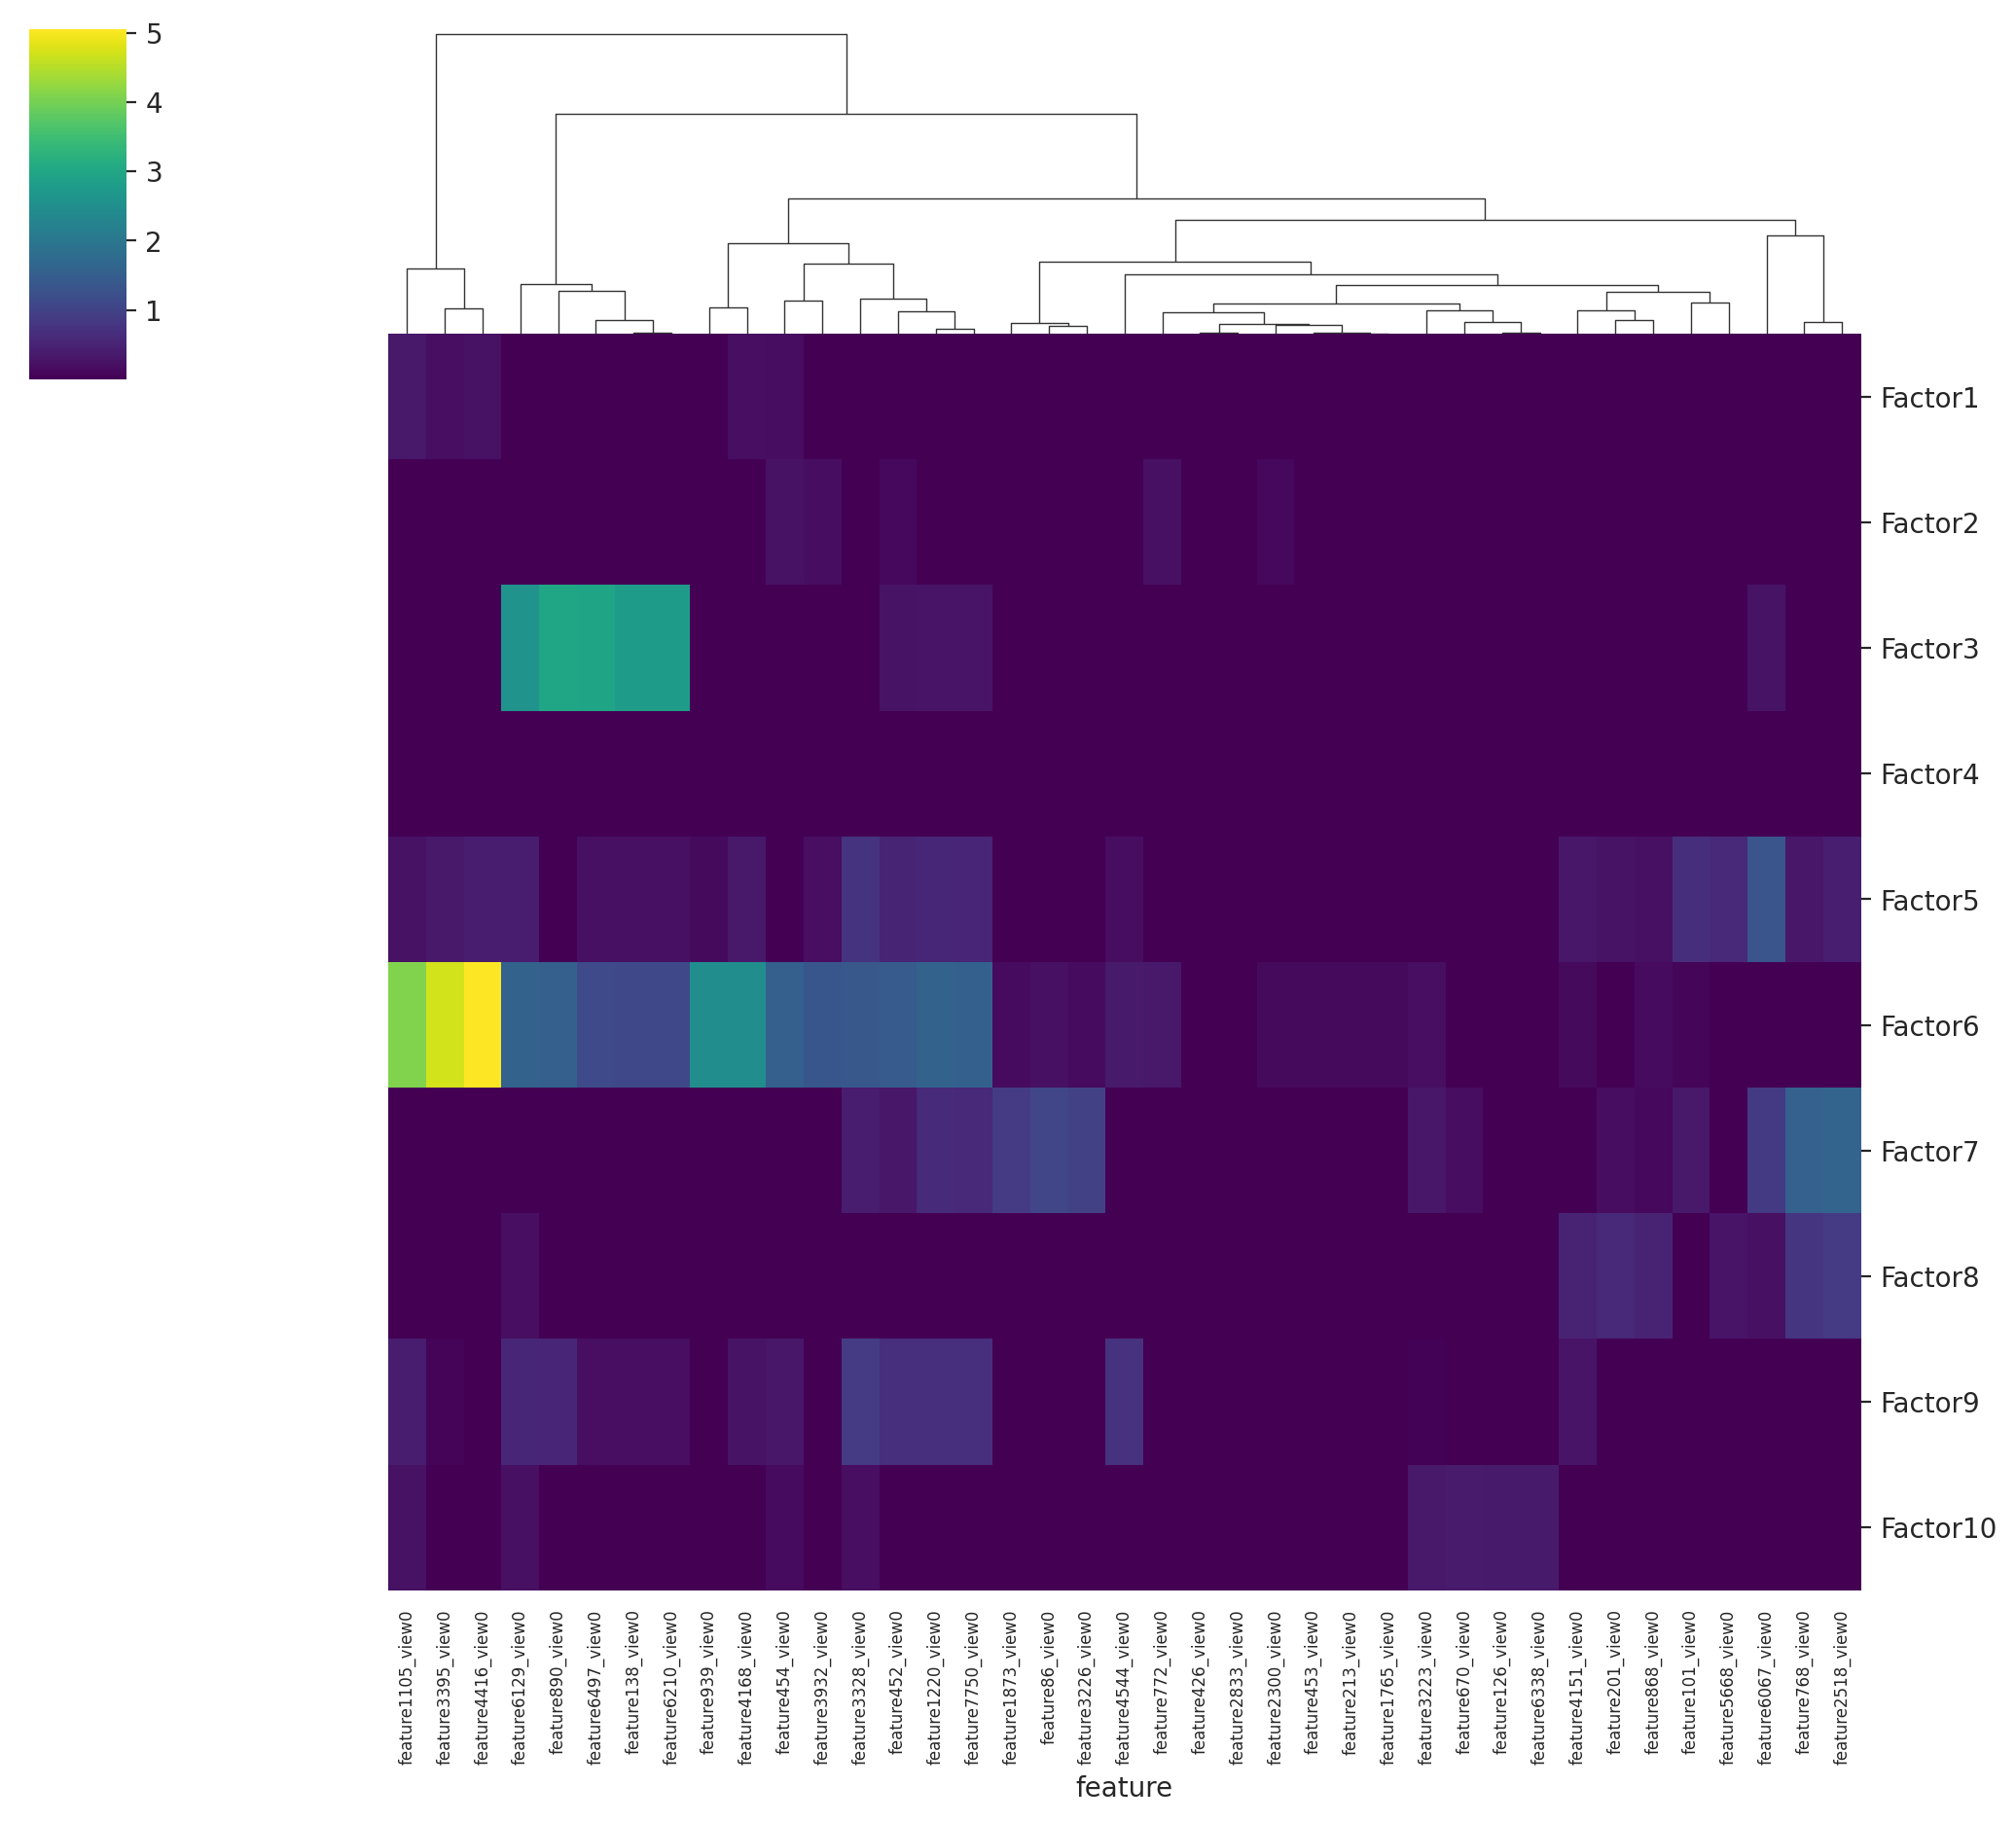

In [13]:
mfx.plot_weights_heatmap(m, n_features=5,
                         factors=range(0, 10),
                         xticklabels_size=6, w_abs=True,
                         cmap="viridis", cluster_factors=False)

<Axes: >

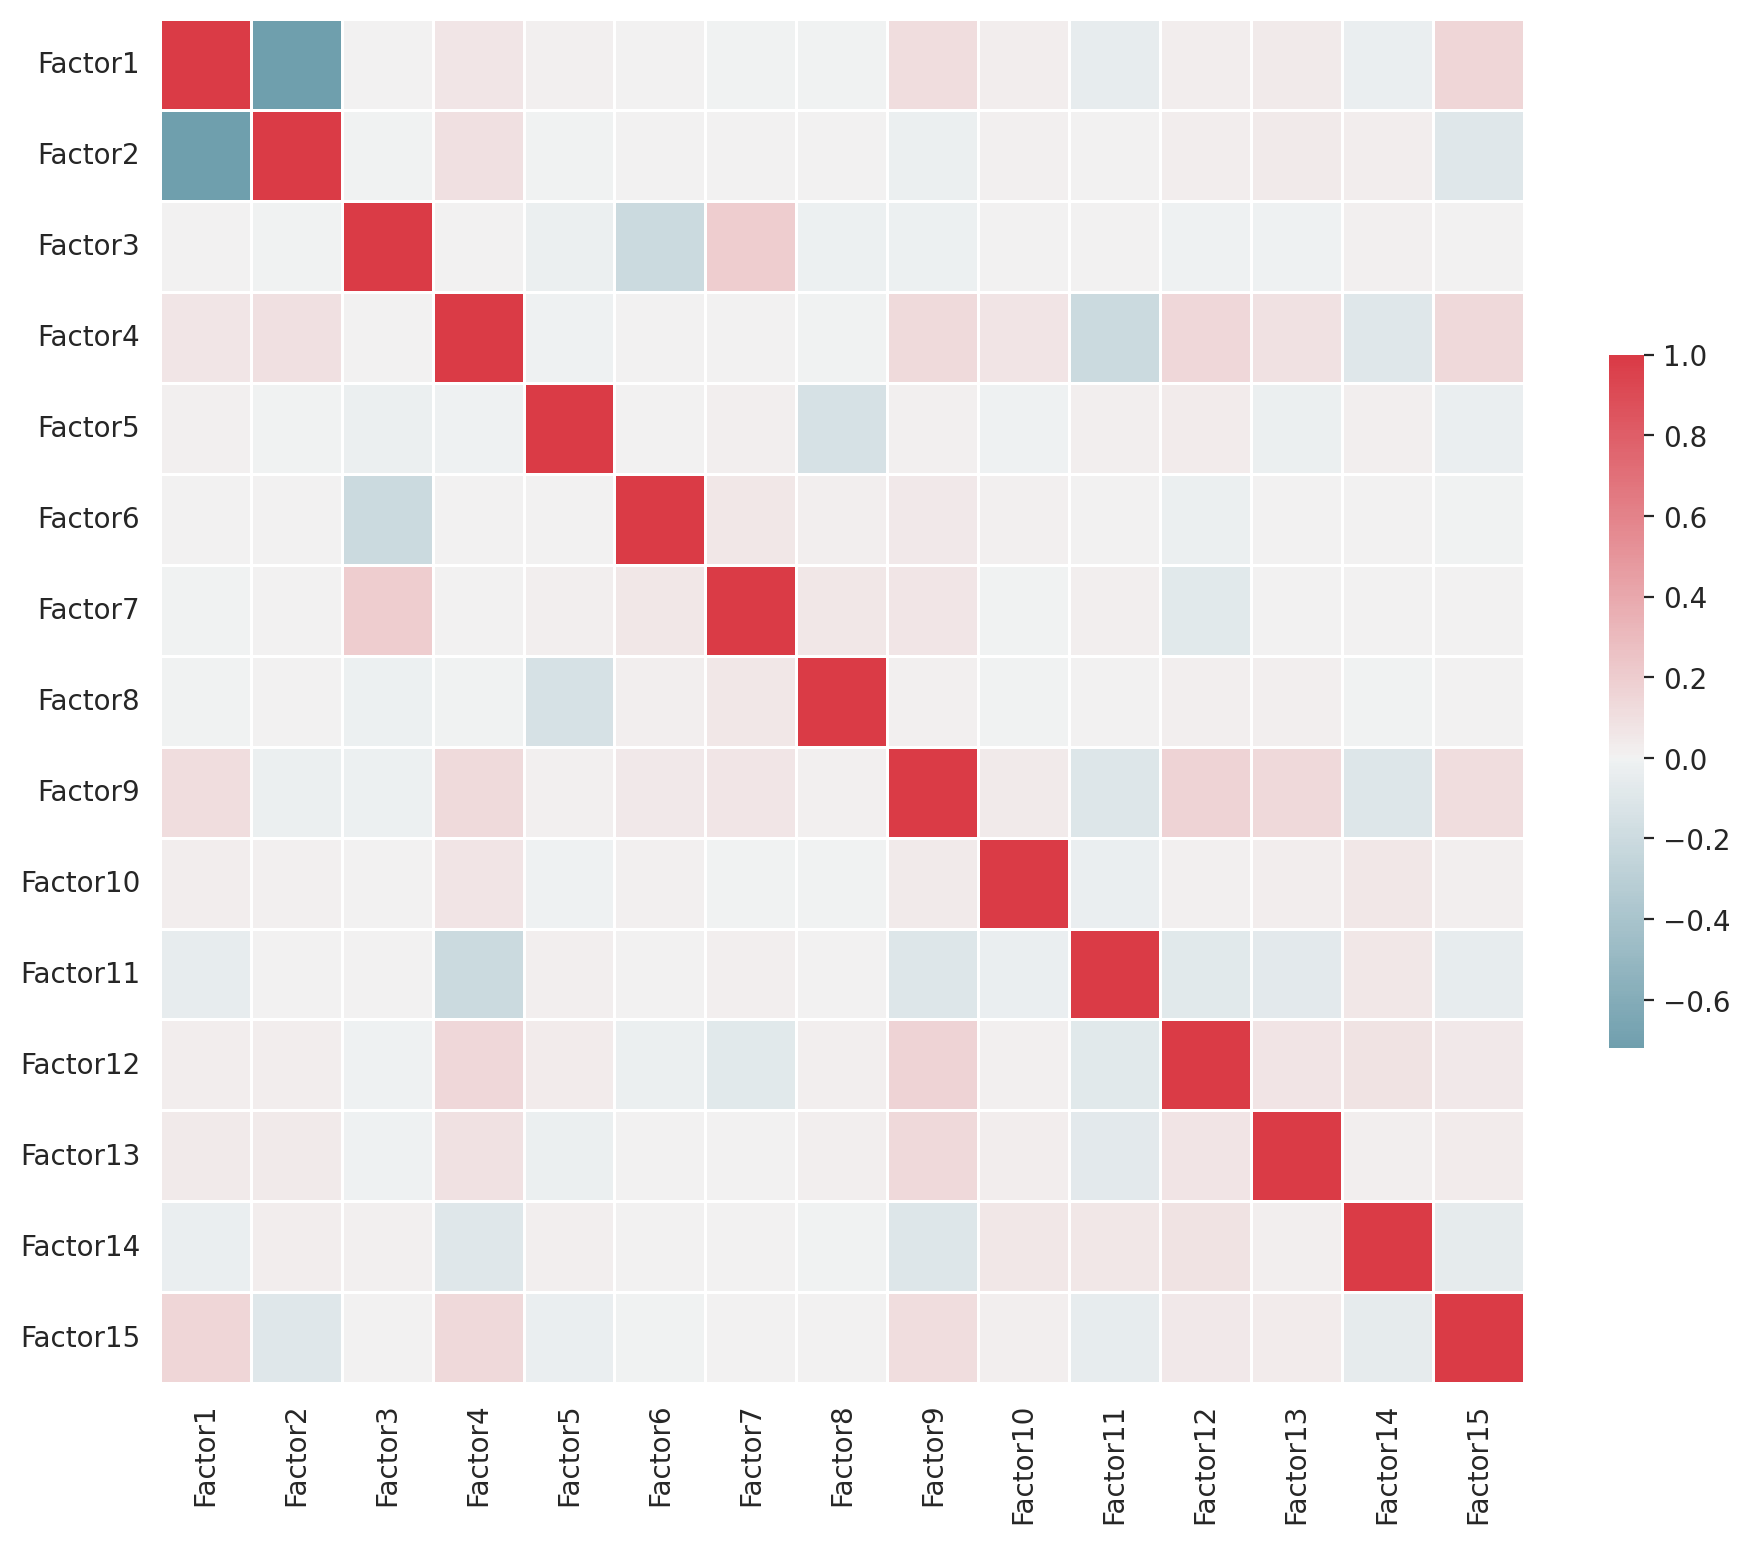

In [14]:
mfx.plot_weights_correlation(m)

<Axes: title={'center': 'Factor4'}, xlabel='Factor1', ylabel='Factor4'>

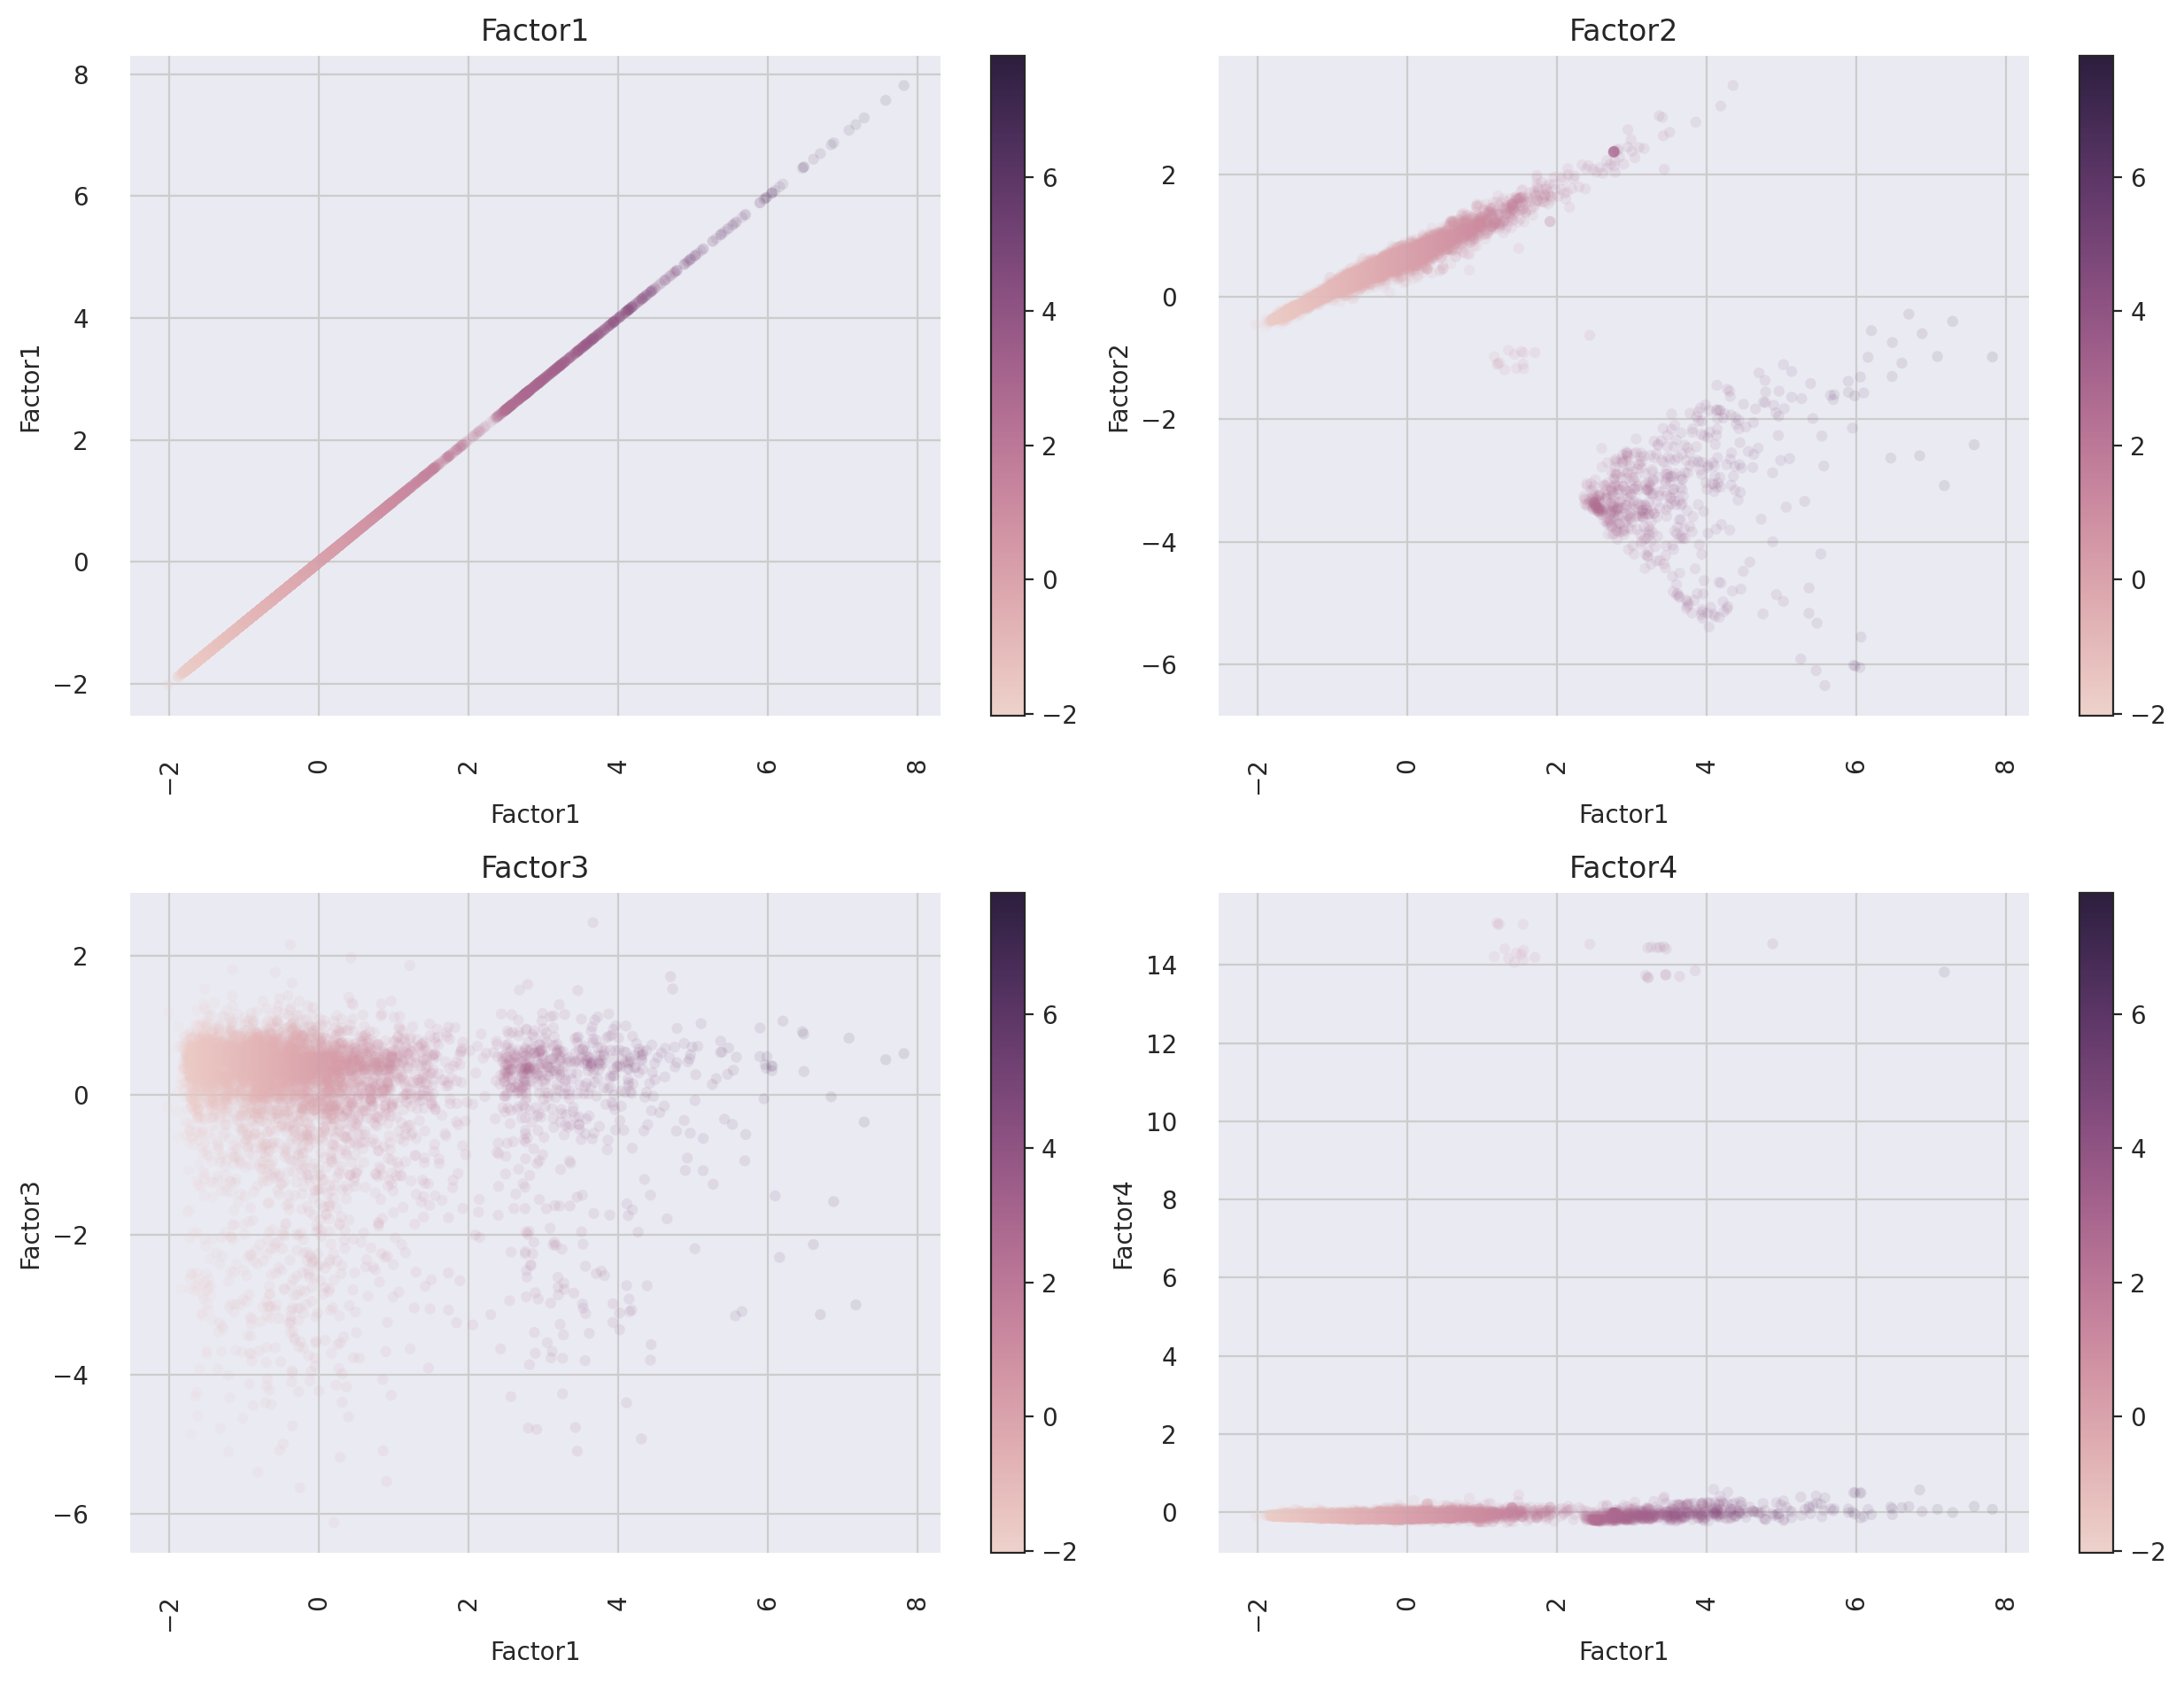

In [21]:
mfx.plot_factors_scatter(
    m,
    x="Factor1", y=range(4), group_label="Factor1", color='Factor1',
    alpha=.1,
    rotate_x_labels=90, ncols=2,
)

## Clustering MOFA Factors

In [30]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

In [28]:
factor_matrix = m.get_factors()
print(factor_matrix.shape)

(5183, 15)


In [37]:
k_range = range(2, 5)
all_mofa_clusterings = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = kmeans.fit_predict(factor_matrix)
    all_mofa_clusterings[k] = clusters
    print(f"Completed k={k}")


Completed k=2
Completed k=3
Completed k=4


In [41]:
from collections import Counter
for k in k_range:
    print(f"k={k}, {Counter(all_mofa_clusterings[k])}")

k=2, Counter({np.int32(0): 4598, np.int32(1): 585})
k=3, Counter({np.int32(1): 4580, np.int32(0): 574, np.int32(2): 29})
k=4, Counter({np.int32(1): 2933, np.int32(0): 1665, np.int32(2): 556, np.int32(3): 29})
